In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading 

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('processed_data_PCA.csv')

# Assuming the last column is the target variable (y), and the rest are features (X)
X = data.drop('y', axis=1)  # Assuming 'y' is your target column
y = data['y']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Check the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (36168, 52)
X_test shape: (9043, 52)


PCA

In [13]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [14]:
# # Initialize PCA
# pca = PCA()

# # Fit PCA on the training data
# X_train_pca = pca.fit_transform(X_train_scaled)

# # Transform the test data
# X_test_pca = pca.transform(X_test_scaled)

# # Check explained variance ratio
# explained_variance = pca.explained_variance_ratio_
# cumulative_variance = explained_variance.cumsum()

# # Plot cumulative explained variance
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('PCA Explained Variance')
# plt.grid()
# plt.show()


In [15]:
# # Retain components explaining 95% of the variance
# pca = PCA(n_components=0.95)
# X_train_reduced = pca.fit_transform(X_train_scaled)
# X_test_reduced = pca.transform(X_test_scaled)

# # Print the shape of the reduced datasets
# print(f"Original features: {X.shape[1]}")
# print(f"Reduced features: {X_train_reduced.shape[1]}")


# Model 

Epoch 1/20, Loss: 0.3188, Accuracy: 0.8831
Epoch 2/20, Loss: 0.2972, Accuracy: 0.8929
Epoch 3/20, Loss: 0.2925, Accuracy: 0.8936
Epoch 4/20, Loss: 0.2900, Accuracy: 0.8939
Epoch 5/20, Loss: 0.2887, Accuracy: 0.8954
Epoch 6/20, Loss: 0.2879, Accuracy: 0.8950
Epoch 7/20, Loss: 0.2856, Accuracy: 0.8953
Epoch 8/20, Loss: 0.2844, Accuracy: 0.8953
Epoch 9/20, Loss: 0.2835, Accuracy: 0.8960
Epoch 10/20, Loss: 0.2818, Accuracy: 0.8966
Epoch 11/20, Loss: 0.2806, Accuracy: 0.8971
Epoch 12/20, Loss: 0.2799, Accuracy: 0.8970
Epoch 13/20, Loss: 0.2787, Accuracy: 0.8978
Epoch 14/20, Loss: 0.2779, Accuracy: 0.8990
Epoch 15/20, Loss: 0.2770, Accuracy: 0.8989
Epoch 16/20, Loss: 0.2758, Accuracy: 0.8998
Epoch 17/20, Loss: 0.2753, Accuracy: 0.8988
Epoch 18/20, Loss: 0.2750, Accuracy: 0.8999
Epoch 19/20, Loss: 0.2737, Accuracy: 0.8999
Epoch 20/20, Loss: 0.2731, Accuracy: 0.9001


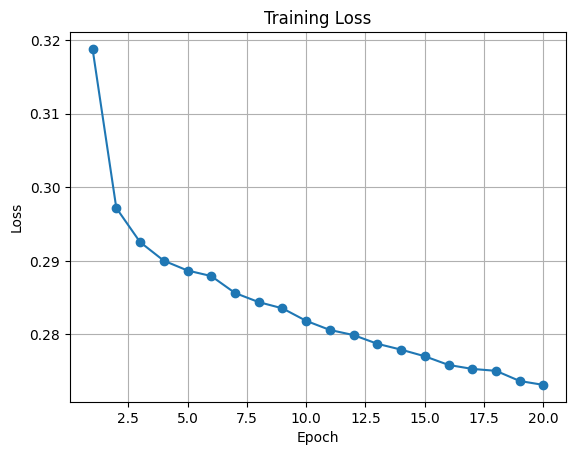

Training Accuracy: 0.9021234240212342
Test Accuracy: 0.8917394669910428
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.62      0.26      0.37      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.62      0.66      9043
weighted avg       0.87      0.89      0.87      9043



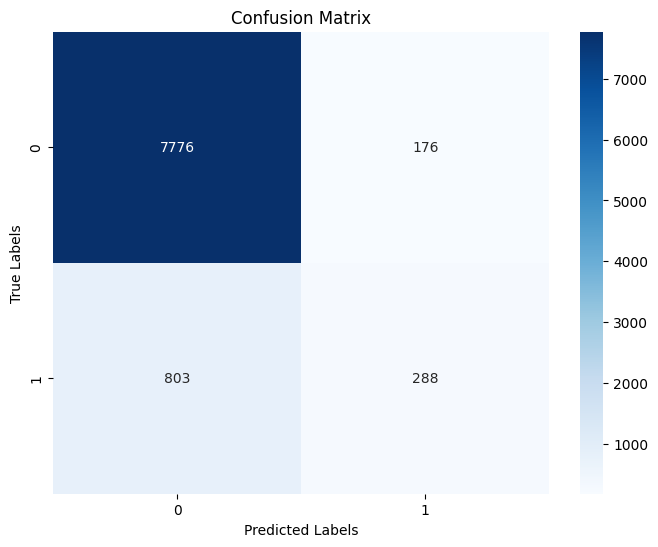

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure reproducibility
torch.manual_seed(42)

# Convert preprocessed DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)
X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First hidden layer
        self.relu = nn.ReLU()                         # Activation function
        self.fc2 = nn.Linear(hidden_size, output_size) # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define model parameters
input_size = X_train.shape[1]  # Number of features
hidden_size = 64               # Number of neurons in the hidden layer
output_size = len(y_train.unique())  # Number of output classes


# Initialize the model
model = NeuralNet(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training the model
epochs = 20
losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    epoch_accuracy = correct / total
    losses.append(epoch_loss / len(train_loader))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy: {epoch_accuracy:.4f}")

# Plot training loss
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Evaluation
model.eval()
y_train_pred = []
y_train_true = []
y_test_pred = []
y_test_true = []

# Training Accuracy
with torch.no_grad():
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_train_pred.extend(predicted.cpu().numpy())
        y_train_true.extend(y_batch.cpu().numpy())

print("Training Accuracy:", accuracy_score(y_train_true, y_train_pred))

# Test Accuracy
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_test_pred.extend(predicted.cpu().numpy())
        y_test_true.extend(y_batch.cpu().numpy())

print("Test Accuracy:", accuracy_score(y_test_true, y_test_pred))

# Classification Report for Test Data
print("Classification Report:")
print(classification_report(y_test_true, y_test_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_true, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# # Save the model
# torch.save(model.state_dict(), 'neural_net_model.pth')
# print("Model saved as 'neural_net_model.pth'")


pca model

In [17]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from torch.utils.data import DataLoader, TensorDataset
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Ensure reproducibility
# torch.manual_seed(42)

# # Convert PCA-reduced DataFrames to PyTorch tensors
# X_train_tensor = torch.tensor(X_train_reduced, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
# X_test_tensor = torch.tensor(X_test_reduced, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# # Device setup
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)
# X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

# # Create DataLoader for batching
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# # Neural Network Model
# class NeuralNet(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(NeuralNet, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)  # First hidden layer
#         self.relu = nn.ReLU()                         # Activation function
#         self.fc2 = nn.Linear(hidden_size, output_size) # Output layer

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return x

# # Define model parameters
# input_size = X_train_reduced.shape[1]  # Number of PCA-reduced features
# hidden_size = 64                       # Number of neurons in the hidden layer
# output_size = len(y_train.unique())    # Number of output classes

# # Initialize the model
# model = NeuralNet(input_size, hidden_size, output_size).to(device)
# criterion = nn.CrossEntropyLoss()  # Loss function for classification
# optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# # Training the model
# epochs = 20
# losses = []

# for epoch in range(epochs):
#     model.train()
#     epoch_loss = 0
#     correct = 0
#     total = 0
#     for X_batch, y_batch in train_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         # Forward pass
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)

#         # Backward pass
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         epoch_loss += loss.item()
#         _, predicted = torch.max(outputs, 1)
#         correct += (predicted == y_batch).sum().item()
#         total += y_batch.size(0)

#     epoch_accuracy = correct / total
#     losses.append(epoch_loss / len(train_loader))
#     print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy: {epoch_accuracy:.4f}")

# # Plot training loss
# plt.plot(range(1, epochs + 1), losses, marker='o')
# plt.title("Training Loss")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.grid()
# plt.show()

# # Evaluation
# model.eval()
# y_train_pred = []
# y_train_true = []
# y_test_pred = []
# y_test_true = []

# # Training Accuracy
# with torch.no_grad():
#     for X_batch, y_batch in train_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         outputs = model(X_batch)
#         _, predicted = torch.max(outputs, 1)
#         y_train_pred.extend(predicted.cpu().numpy())
#         y_train_true.extend(y_batch.cpu().numpy())

# print("Training Accuracy:", accuracy_score(y_train_true, y_train_pred))

# # Test Accuracy
# with torch.no_grad():
#     for X_batch, y_batch in test_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         outputs = model(X_batch)
#         _, predicted = torch.max(outputs, 1)
#         y_test_pred.extend(predicted.cpu().numpy())
#         y_test_true.extend(y_batch.cpu().numpy())

# print("Test Accuracy:", accuracy_score(y_test_true, y_test_pred))

# # Classification Report for Test Data
# print("Classification Report:")
# print(classification_report(y_test_true, y_test_pred))

# # Confusion Matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_matrix(y_test_true, y_test_pred), annot=True, fmt='d', cmap='Blues')
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()

# # Save the model (optional)
# # torch.save(model.state_dict(), 'neural_net_model_pca.pth')
# # print("Model saved as 'neural_net_model_pca.pth'")


# Tunning 

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define the model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Evaluate the model
def evaluate_model(model, data_loader, device):
    model.eval()
    y_pred, y_true = [], []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(y_batch.cpu().numpy())
    return accuracy_score(y_true, y_pred), y_true, y_pred

# Train the model with early stopping
def train_model_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, device, epochs=20, patience=5):
    model.train()
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        epoch_loss = 0
        correct_train = 0
        total_train = 0
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == y_batch).sum().item()
            total_train += y_batch.size(0)
            
            epoch_loss += loss.item()

        # Calculate training accuracy
        train_accuracy = correct_train / total_train

        # Validate the model
        val_loss = 0
        model.eval()
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
        val_loss /= len(val_loader)

        # print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {epoch_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}")

        # Check early stopping condition
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered after {epoch + 1} epochs.")
                break

# Hyperparameter tuning
def tune_hyperparameters(X_train, y_train, X_test, y_test, hidden_sizes, learning_rates, batch_sizes):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    best_accuracy = 0
    best_hyperparameters = {}

    # Split training data into training and validation sets
    X_train_split, X_val, y_train_split, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )

    for hidden_size in hidden_sizes:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                # Create DataLoaders
                train_dataset = TensorDataset(torch.tensor(X_train_split.values, dtype=torch.float32),  # Convert to NumPy array
                               torch.tensor(y_train_split.values, dtype=torch.long))  # Convert to NumPy array
                val_dataset = TensorDataset(torch.tensor(X_val.values, dtype=torch.float32),  # Convert to NumPy array
                             torch.tensor(y_val.values, dtype=torch.long))  # Convert to NumPy array
                test_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32),  # Convert to NumPy array
                              torch.tensor(y_test.values, dtype=torch.long))  # Convert to NumPy array

                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
                test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

                # Initialize the model
                model = NeuralNet(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=2).to(device)
                criterion = nn.CrossEntropyLoss()
                optimizer = optim.Adam(model.parameters(), lr=lr)

                # Train the model
                train_model_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, device)

                # Evaluate on validation set
                val_accuracy, _, _ = evaluate_model(model, val_loader, device)

                # Update best hyperparameters
                if val_accuracy > best_accuracy:
                    best_accuracy = val_accuracy
                    best_hyperparameters = {'hidden_size': hidden_size, 'lr': lr, 'batch_size': batch_size}
                    # Save the best model
                    torch.save(model.state_dict(), "best_NN_model.pth")

                print(f"Hidden Size: {hidden_size}, LR: {lr}, Batch Size: {batch_size}, Val Accuracy: {val_accuracy:.4f}")

    # Evaluate on the test set
    best_model = NeuralNet(input_size=X_train.shape[1], hidden_size=best_hyperparameters['hidden_size'], output_size=2).to(device)
    best_model.load_state_dict(torch.load("best_NN_model.pth"))
    test_accuracy, y_true, y_pred = evaluate_model(best_model, test_loader, device)

    # Print metrics
    print(f"Best Hyperparameters: {best_hyperparameters}")
    print(f"Best Validation Accuracy: {best_accuracy:.4f}")
    print(f"Test Accuracy with Best Hyperparameters: {test_accuracy:.4f}")

    # Classification report
    print("\nClassification Report on Test Set:")
    print(classification_report(y_true, y_pred))

# Example hyperparameter values
hidden_sizes = [32, 64, 128]
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64]

# Assuming X_train, y_train, X_test, y_test are already prepared and normalized
tune_hyperparameters(X_train, y_train, X_test, y_test, hidden_sizes, learning_rates, batch_sizes)


Early stopping triggered after 9 epochs.
Hidden Size: 32, LR: 0.01, Batch Size: 16, Val Accuracy: 0.8878
Early stopping triggered after 12 epochs.
Hidden Size: 32, LR: 0.01, Batch Size: 32, Val Accuracy: 0.8890
Early stopping triggered after 11 epochs.
Hidden Size: 32, LR: 0.01, Batch Size: 64, Val Accuracy: 0.8875
Early stopping triggered after 14 epochs.
Hidden Size: 32, LR: 0.001, Batch Size: 16, Val Accuracy: 0.8909
Early stopping triggered after 16 epochs.
Hidden Size: 32, LR: 0.001, Batch Size: 32, Val Accuracy: 0.8904
Hidden Size: 32, LR: 0.001, Batch Size: 64, Val Accuracy: 0.8915
Hidden Size: 32, LR: 0.0001, Batch Size: 16, Val Accuracy: 0.8898
Hidden Size: 32, LR: 0.0001, Batch Size: 32, Val Accuracy: 0.8902
Hidden Size: 32, LR: 0.0001, Batch Size: 64, Val Accuracy: 0.8889
Early stopping triggered after 10 epochs.
Hidden Size: 64, LR: 0.01, Batch Size: 16, Val Accuracy: 0.8862
Early stopping triggered after 14 epochs.
Hidden Size: 64, LR: 0.01, Batch Size: 32, Val Accuracy: 0

C:\Users\wasif\AppData\Local\Temp\ipykernel_7524\611363210.py:136: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load("best_NN_model.pth"))


In [19]:
# from sklearn.metrics import roc_auc_score, roc_curve
# import matplotlib.pyplot as plt

# # Function to calculate and plot ROC-AUC
# def calculate_roc_auc(model, data_loader, device, plot_roc=False):
#     model.eval()
#     y_true, y_probs = [], []
#     with torch.no_grad():
#         for X_batch, y_batch in data_loader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             outputs = model(X_batch)
#             probs = torch.softmax(outputs, dim=1)[:, 1]  # Get probabilities for the positive class
#             y_true.extend(y_batch.cpu().numpy())
#             y_probs.extend(probs.cpu().numpy())
    
#     # Calculate ROC-AUC score
#     roc_auc = roc_auc_score(y_true, y_probs) if len(set(y_true)) > 1 else None
    
#     # Optionally plot ROC curve
#     if plot_roc and roc_auc is not None:
#         fpr, tpr, _ = roc_curve(y_true, y_probs)
#         plt.figure(figsize=(8, 6))
#         plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
#         plt.plot([0, 1], [0, 1], color='red', linestyle='--')
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.title('Receiver Operating Characteristic (ROC) Curve')
#         plt.legend()
#         plt.grid()
#         plt.show()
    
#     return roc_auc

# # Example usage:
# # Assuming `test_loader` is your DataLoader for the test set and `best_model` is your trained model
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# roc_auc = calculate_roc_auc(best_model, test_loader, device, plot_roc=True)
# print(f"Test ROC-AUC: {roc_auc:.4f}")


C:\Users\wasif\AppData\Local\Temp\ipykernel_7524\719535319.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load("best_NN_model.pth"))


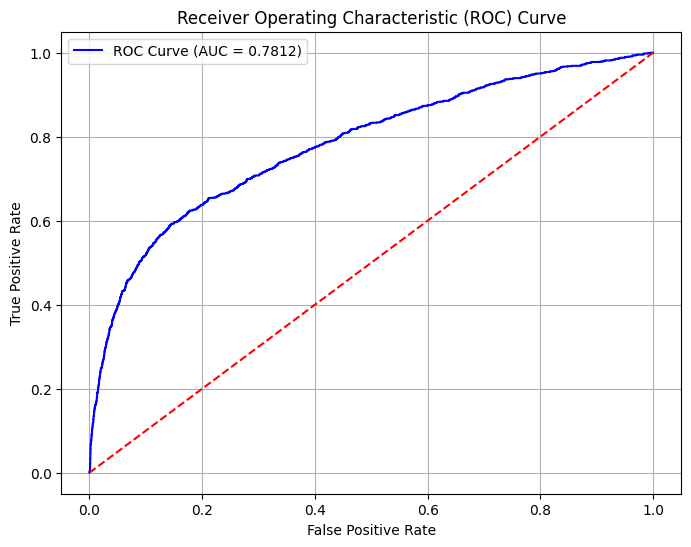

Test ROC-AUC: 0.7812


In [20]:
# Define the model architecture with correct hidden size
best_hidden_size = 32  # Replace with the hidden size used during training
best_model = NeuralNet(input_size=X_train.shape[1], hidden_size=best_hidden_size, output_size=2).to(device)

# Load the best model from saved file
best_model.load_state_dict(torch.load("best_NN_model.pth"))

# Define the test_loader
test_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32),
                              torch.tensor(y_test.values, dtype=torch.long))
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Calculate and plot ROC-AUC
roc_auc = calculate_roc_auc(best_model, test_loader, device, plot_roc=True)
print(f"Test ROC-AUC: {roc_auc:.4f}")


pca 

# Save

In [21]:
# # Save the entire model
# torch.save(model.state_dict(), "best_model_full.pth")
# print("Full model saved successfully!")
